# Conjugate gradient method

## Introduction
The conjugate gradient method improves upon the gradient descent method, as it is not going in the direction of steepest descent, but a direction that is more targeted towards the minima. The directions are conjugate to each other, i.e., they are perpendicular in a transformed space, ensuring that the step directions give faster convergence. Unfortunately, there are only certain systems that can be transformed this way: systems of linear equations where the matrix is symmetric and positive-definite. Fortunately, a lot of problems in engineering and machine learning are of exactly this type.

The conjugate gradient method is probably the most popular method for solving large systems of linear equations (given that the system adheres to certain restrictions, as pointed out above, and which will be given in detail below). The method was introduced by Hestenes and Stiefel in 1952 [1]. We will consider a system of linear equations with $n$ variables and $n$ equations.
$$
\begin{align}
a_{11} x_1 + a_{12} x_2 + \cdots +a_{1n}x_n &= b_1 \\
a_{21} x_1 + a_{22} x_2 + \cdots +a_{2n}x_n &= b_2 \\
\vdots \\
a_{n1} x_1 + a_{n2} x_2 + \cdots +a_{nn}x_n &= b_n
\end{align}
$$

This system of linear equations can be rewritten in matrix form as $\bf{A}\bf{x}=\bf{b}$, where $\mathbf{A} \in \mathbb{R}^{n \times n}$, $\mathbf{x} \in \mathbb{R}^n$, and $\mathbf{b} \in \mathbb{R}^n$.

In this lecture, we will consider systems where $\bf{A}$ is a symmetric, positive definite square matrix (see definitions below). Such a system will be solved by the conjugate gradient method, or CG-method for short. We will consider it as an iterative algorithm, which is the usual way of implementing it. It is well-suited for large, sparse matrices, as we have already encountered in the course when we solved partial differential equations on grid models.


### Matrix definitions

In this lecture, we will always assume that $\mathbf{A}$ is a square matrix, thus $\mathbf{A} \in \mathbb{R}^{n\times n}$.

<b>Definition:</b> A matrix $\mathbf{A}$ is <i>symmetric</i> when $\mathbf{A}^\text{T} = \mathbf{A}$.

<b>Definition:</b> A matrix $\mathbf{A}$ is <i>positive definite</i> when $\mathbf{x}^\text{T}\mathbf{A}\mathbf{x} > 0 \, \forall \, \mathbf{x}$.

<b>Lemma:</b> A matrix $\mathbf{A}$ is <i>positive definite</i> if and only if all its eigenvalues are positive.

### Quadratic form

A quadratic form is a polynomial of degree two, e.g., $3x^2+4xy+2y^2$. 

Any $n \times n$ matrix $\mathbf{A}$ defines a quadratic from, usually denote $q_\mathbf{A}$, as $$q_\mathbf{A} = \mathbf{x}^\text{T} \mathbf{A} \mathbf{x}$$

As an example, the matrix
$$\mathbf{B} = \begin{bmatrix}3&1\\3&2\end{bmatrix}$$
will give the quadratic form $q_\mathbf{B} = 3x^2+4xy+2y^2$. Note that $$\mathbf{C} = \begin{bmatrix}3&4\\0&2\end{bmatrix}$$ will give the same quadratic from $q_\mathbf{C} = 3x^2+4xy+2y^2 = q_\mathbf{B}$. There is, however, a <i>unique symmetric</i> matrix representing the quadratic form:
$$\mathbf{A} = \begin{bmatrix}3&2\\2&2\end{bmatrix}$$
Whenever we talk of the matrix representation $\mathbf{A}$ of a quadratic form $q_\mathbf{A}$, we will always mean the unique symmetric matrix. 

From a positive definite symmetric matrix $\mathbf{A}$ and a vector $\mathbf{b}$ we can define a quadratic form as $$f(\mathbf{x}) =\frac{1}{2}\mathbf{x}^\text{T} \mathbf{A} \mathbf{x} - \mathbf{b}^\text{T} \mathbf{x} + c$$
It can be shown that if $\mathbf{A}$ is positive definite, then $f(\mathbf{x})$ looks like a paraboloid bowl, i.e., a curved surface that can be formed by rotating a parabola around its axis of symmetry. See code below for an example plot. Note that the value $c$ is only shifting the quadratic form, and thus the height of the paraboloid bowl.


#### Check if matrix is positive definite

To check if a matrix is positive definite, we can check if the eigenvalues are positive. In the code below, we will check if the matrix 
$$\mathbf{A} = \begin{bmatrix}3&2\\2&2\end{bmatrix}$$
is positive definite by checking all its eigenvalues.

In [4]:
import numpy as np
A=np.array([[3, 2],[2,2]])
np.linalg.eigvals(A)


array([4.56155281, 0.43844719])

As both eigenvalues are positive, the matrix $\mathbf{A}$ is positive definite.

Below, we have a code to plot the parabolic bowl for a given matrix.

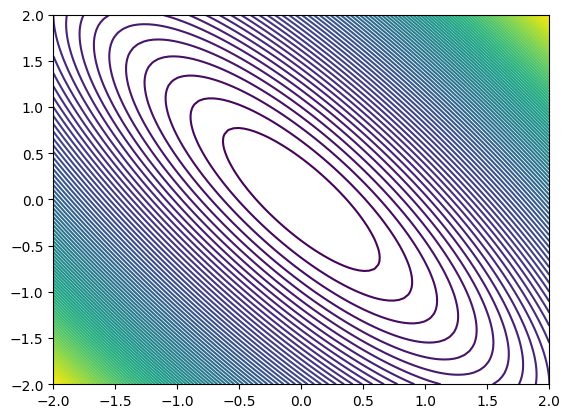

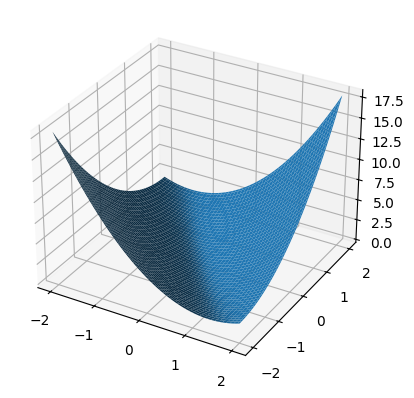

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class CCG:
    def __init__(self):
        self.aafA=np.array([[3, 2],[2,2]])
        self.afb=np.array([2,1])
        self.fc=0

    def f(self,x,y):
        aafXv=np.array([x,y])
        return 0.5*np.dot(np.dot(aafXv.T,self.aafA),aafXv)-np.dot(self.afb.T,aafXv)+self.fc

    def calcQuadraticFormValues(self):
        afX = np.linspace(-2, 2, 100)
        afY = np.copy(afX)

        aafXv, aafYv = np.meshgrid(afX, afY)
        afXr=np.ravel(aafXv)
        afYr=np.ravel(aafYv)

        lZ=[]
        for ii in range(0,len(afXr)):
            lZ.append(self.f(afXr[ii],afYr[ii]))
        aafZr=np.asarray(lZ)
        aafZv=aafZr.reshape(aafXv.shape)
        return aafXv,aafYv,aafZv

    
    def plotQuadraticForm(self):
        aafXv,aafYv,aafZv=self.calcQuadraticFormValues()
        fig = plt.figure()
        plt.contour(aafXv,aafYv,aafZv,100)
    
    def plotQFOnly(self):
        self.plotQuadraticForm()
        plt.show()

        aafXv,aafYv,aafZv=self.calcQuadraticFormValues()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(aafXv,aafYv,aafZv)
        plt.show()


tQuadraticForm=CCG()
tQuadraticForm.plotQFOnly()

### Quadratic form optimization

We now want to optimize the function $f$ by finding its extremum, i.e., finding the extremum of the quadratic form given by $f$. When $\mathbf{A}$ is positive definite, the extremum of $f$ will be its minimum, so we will talk about finding the minimum of $f$ in the following.

Thus, we want to find a vector $\mathbf{x}$ where $\nabla f(\mathbf{x}) = 0$. Remember that $$\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f}{\partial x_1} (\mathbf{x}) \\ \vdots \\ \frac{\partial f}{\partial x_n} (\mathbf{x})\end{bmatrix}$$
If we take the gradient of $\mathbf{x}^\text{T} \mathbf{A} \mathbf{x}$, using the product rule we get
$$\nabla (\mathbf{x}^\top \mathbf{A} \mathbf{x}) = (\nabla \mathbf{x})^\top \mathbf{A} \mathbf{x} + (\nabla (\mathbf{A} \mathbf{x}))^\top \mathbf{x} = \mathbf{I}^\top \mathbf{A} \mathbf{x} + \mathbf{A}^\top \mathbf{x} =  \mathbf{A} \mathbf{x} + \mathbf{A}^\top \mathbf{x}$$

It can then be shown that the gradient of $f(\mathbf{x})=\frac{1}{2}\mathbf{x}^\text{T} \mathbf{A} \mathbf{x} - \mathbf{b}^\text{T} \mathbf{x} + c$ is $$ \nabla f(\mathbf{x}) = \frac{1}{2}\mathbf{A}^\text{T} \mathbf{x} + \frac{1}{2}\mathbf{A} \mathbf{x} - \mathbf{b} $$

Since $\mathbf{A}$ is symmetric we have that $\mathbf{A}^\text{T} = \mathbf{A}$, thus
$$\nabla f(\mathbf{x}) = \mathbf{A} \mathbf{x} - \mathbf{b}$$

Note that if $\mathbf{A}$ is not symmetric we get $\frac{1}{2} \left( \mathbf{A}^\text{T} + \mathbf{A} \right)\mathbf{x} = \mathbf{b}$, where $\left( \mathbf{A}^\text{T} + \mathbf{A} \right)$ is symmetric.

So, to find the minimum of $f(\mathbf{x})$, we find the vector $\mathbf{x}$ where $\nabla f = 0$. In other words, we find $\mathbf{A}\mathbf{x} - \mathbf{b} = 0$, which means we solve the system of linear equations $$\mathbf{A} \mathbf{x} = \mathbf{b}$$
by minimizing the quadratic from $$f(\mathbf{x}) =\frac{1}{2}\mathbf{x}^\text{T} \mathbf{A} \mathbf{x} - \mathbf{b}^\text{T} \mathbf{x}$$

This is what we want to do with the gradient descent method. But first, let us have a look at the steepest descent method.

### Steepest descent

In the steepest descent algorithm, we progress from an arbitrary point $\mathbf{x}_0$ towards the minimal point of $f(\mathbf{x})$ by moving in the direction of the steepest descent. The direction of the steepest descent at a point is given by the gradient $\nabla f(\mathbf{x}) =  \mathbf{A} \mathbf{x} - \mathbf{b}$. Since we will use this steepest descent direction repeatedly, we will define $\mathbf{r} = -\nabla f(\mathbf{x})$ as the direction of steepest descent. Note that the direction vector $\mathbf{r}$ is not necessarily of length 1.

Steepest descent is an iterative optimization method that can be written in the form
$$
\mathbf{x}_{i+1} = \mathbf{x}_i-\alpha_i\nabla f(\mathbf{x}_i) = \mathbf{x}_i + \alpha_i \mathbf{r}_i
$$
where we have used our definition of steepest descent direction $\mathbf{r}_i = -\nabla f(\mathbf{x}_i)$. Thus $\mathbf{r}_i$ is the direction of steepest descent in point $\mathbf{x}_i$.

If we consider $\mathbf{x}_{i+1}$ as a function of $\alpha_i$, then the step length $\alpha_i$ should minimize $\Phi(\alpha_i) = f(\mathbf{x}_{i+1}(\alpha_i))$:
$$
\frac{d f(\mathbf{x}_{i+1})}{d \alpha_i} = \left[ \nabla f(\mathbf{x}_{i+1}) \right]^\text{T} \frac{d \mathbf{x}_{i+1}}{d \alpha_i} = -\left[ \nabla f(\mathbf{x}_{i+1}) \right]^\text{T} \nabla f(\mathbf{x}_i) = 
$$
$$-\mathbf{r}_{i+1}^\text{T} \mathbf{r}_{i} = 0 $$

Thus, in the steepest descent method the next $\mathbf{r}_{i+1}$ and current $\mathbf{r}_{i}$ search directions are orthogonal, i.e., $\mathbf{r}_{i+1}^\text{T} \mathbf{r}_{i} = 0 $. Note that this holds for an arbitrary $f(\mathbf{x})$.

Remember that $\mathbf{r}_i = -\nabla f(\mathbf{x}_i) = \mathbf{b} - \mathbf{A} \mathbf{x}_i$. We can then find the value of $\alpha_i$ that minimize $\Phi(\alpha_i) = f(\mathbf{x}_{i+1}(\alpha_i))$:
$$\begin{align}
\frac{d f(\mathbf{x}_{i+1})}{d \alpha_i} &= 0 \\
\mathbf{r}_{i+1}^\text{T} \mathbf{r}_{i} &= 0 \\
\left[ \mathbf{b} - \mathbf{A} \mathbf{x}_{i+1} \right]^\text{T} \mathbf{r}_i &= 0 \\
\left[ \mathbf{b} - \mathbf{A} (\mathbf{x}_i+\alpha_i\mathbf{r}_i) \right]^\text{T} \mathbf{r}_i &= 0\\
\left[\mathbf{b} - \mathbf{A}\mathbf{x}_i\right]^\text{T} \mathbf{r}_i - \alpha_i \left[ \mathbf{A}\mathbf{r}_i \right]^\text{T} \mathbf{r}_i &= 0 \\
\mathbf{r}_i^\text{T} \mathbf{r}_i - \alpha_i \mathbf{r}_i^\text{T}\mathbf{A}  \mathbf{r}_i &= 0 
\end{align}$$
In the last line we used that $\mathbf{A}$ is symmetric, i.e., $\mathbf{A}^\text{T} = \mathbf{A}$. We thus get 
$$\alpha_i = \frac{\mathbf{r}_i^\text{T} \mathbf{r}_i}{\mathbf{r}_i^\text{T} \mathbf{A} \mathbf{r}_i}$$
Note that the step-length given by $\alpha_i$ only holds when $\mathbf{A}$ is a symmetric and positive definite matrix. This is thus not a general method to find the step length.

Following this procedure, we will move iteratively towards the minimal value of $\nabla f(\mathbf{x}) = \mathbf{A} \mathbf{x} - \mathbf{b}$, thus finding a solution to the set of linear equations $\mathbf{A} \mathbf{x} = \mathbf{b}$. This is summarized in the following iterative pseudo-code, where we start with an initial vector $\mathbf{x}_0$:

- Find search direction $\mathbf{r}_i = -\nabla f(\mathbf{x}_i) = \mathbf{b} - \mathbf{A} \mathbf{x}_{i}$
- Find step length  $\alpha_i = \frac{\mathbf{r}_i^\text{T} \mathbf{r}_i}{\mathbf{r}_i^\text{T} \mathbf{A} \mathbf{r}_i}$
- Update current position $\mathbf{x}_{i+1} = \mathbf{x}_{i} + \alpha_i \mathbf{r}_i$

Below, we implement this steepest descent in Python.


Number of iterations:  27


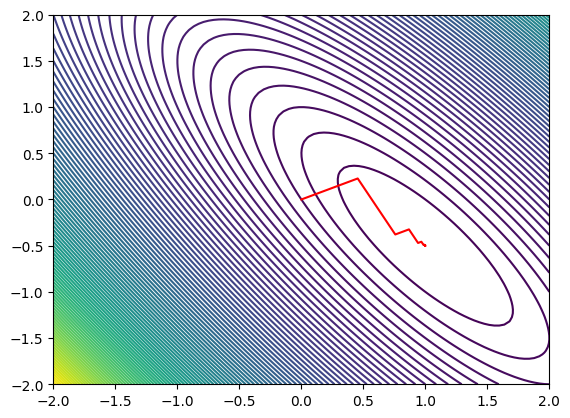

[ 0.99999999 -0.49999999] True
[ 1.  -0.5]


In [6]:
from math import *

def steepdesc(self,afX,iMaxiter,fEps):
    bSuccess = False
    #Create a list to plot
    lX=[]
    lY=[]
    lX.append(afX[0])
    lY.append(afX[1])
    #Iterate over estimates of x
    for ii in range(0,iMaxiter):  
        #Find search direction:
        afR = self.afb-np.dot(self.aafA,afX)
        fRes = sqrt(np.dot(afR,afR))
        #fval = 0.5*np.dot(afX,np.dot(self.aafA,afX))-np.dot(self.afb,afX)
        #print("Iteration: ",ii,"f value: ",fval,"Error: ",fRes,"Position: ",afX,"Direction: ",afR)
        if(fRes < fEps):
            bSuccess = True
            break

        #Compute alfa
        fAlpha = np.dot(afR,afR)/np.dot(afR,np.dot(self.aafA,afR))

        #update solution
        afX = afX+fAlpha*afR
        lX.append(afX[0])
        lY.append(afX[1])

    print('Number of iterations: ',ii)
    self.plotPath(lX,lY,'r')
    return [afX,bSuccess]

def plotPath(self,lX,lY,color):
    self.plotQuadraticForm()
    plt.plot(lX,lY,color=color)
    plt.show()

#Adding steepest descent to class
CCG.steepdesc=steepdesc
CCG.plotPath=plotPath

fEps=1.0e-08
iMaxiter = 100
afX0=np.array([0,0])

afX,bSuccess = tQuadraticForm.steepdesc(afX0,iMaxiter,fEps)

print(afX,bSuccess)

aafInvA=np.linalg.inv(tQuadraticForm.aafA)
print(np.dot(aafInvA,tQuadraticForm.afb))

As might be obvious from trying out the code above for different linear systems $\mathbf{A} \mathbf{x} = \mathbf{b}$ and different initial positions $\mathbf{x}_0$ that the method is both unstable and has slow convergence. The reason is that the response surface of the quadratic form $f(\mathbf{x}) =\frac{1}{2}\mathbf{x}^\text{T} \mathbf{A} \mathbf{x} - \mathbf{b}^\text{T} \mathbf{x}$ is so elliptic. For the simple case of a $2\times 2$ matrix $\mathbf{A} = I$, the contour lines of the quadratic form will be circular, and the steepest descent will work fine. However, this is a trivial example that does not really need a numerical method to be solved. For more complex $\mathbf{A}$, the contour lines will be elliptic, and the gradient will not point towards the minimum of the quadratic form. In such cases, the steepest descent will use a high number of iterations to reach the minimum.

![alt text](steepest_descent_quadratic.png "Title")

With the conjugate gradient method, we will transform the space, using the eigenvectors, so that we end up in a space where the contour lines are spherical, and thus where the steepest descent will work smoothly.

### Conjugate gradient method

In normal Euclidean space $\mathbb{R}^n$, two vectors $\mathbf{x}$ and $\mathbf{y}$ are orthogonal when $\mathbf{x}^\text{T} \mathbf{y} = 0$. The vector product $\mathbf{x}^\text{T} \mathbf{y}$ is called the <i>inner product</i>, and often denoted $\left<\mathbf{x},\mathbf{y} \right>$.

For the conjugate gradient method, we want to work in a space that is transformed by the matrix $\mathbf{A}$. To talk about orthogonality in the transformed space, we need the following definition:

<b>Definition:</b> Two vectors $\mathbf{x}$ and $\mathbf{y}$ are called $\mathbf{A}$-orthogonal (or conjugate) when $\mathbf{x}^\text{T} \mathbf{A} \mathbf{y} = 0$.

It is also common to denote $\mathbf{x}^\text{T} \mathbf{A} \mathbf{y}$ as $\left<\mathbf{x},\mathbf{y} \right>_\mathbf{A}$

In some sense, the two vectors are then orthogonal in the space stretched by $\mathbf{A}$. Thus, if we transform the space given by $\mathbf{A}$ back to the "original" space (where all the contours are spherical), then the two vectors will be orthogonal in the usual sense.

As with the steepest descent, we want to move the current location $\mathbf{x}_i$ iteratively, but this time in a direction $\mathbf{d}_i$, where the different $\mathbf{d}_i$ vectors are $\mathbf{A}$-orthogonal. We thus want to iterate the position as
$$\mathbf{x}_{i+1} = \mathbf{x}_i + \alpha_i \mathbf{d}_i$$
where $\mathbf{d}_i$ is the direction and $\alpha_i$ is the step length, and where $\mathbf{d}_i$ is conjugate to $\mathbf{d}_{i+1}$.

The search direction is updated iteratively as:
$$\mathbf{d}_{i+1} = \mathbf{r}_{i+1} + \beta_{i+1} \mathbf{d}_i$$
To find the $\beta$ values, we will use the Gram-Schmidt process.

#### Error and residual
For our method, we will need to define both an error and a residual. The <i>error</i> $\mathbf{e}_i = \mathbf{x}_i - \mathbf{x}$ indicates how far we are from the exact solution $\mathbf{x}$. The <i>residual</i> $\mathbf{r}_i = \mathbf{b} - \mathbf{A}\mathbf{x}_i$ indicates how far we are from the correct value of $\mathbf{b}$. Note that this is still the same $\mathbf{r}_i$ as we have used above,  $\mathbf{r}_i = -\nabla f(\mathbf{x}_i) = \mathbf{b} - \mathbf{A} \mathbf{x}_{i}$.

We have the following connection between $\mathbf{r}_i$ and $\mathbf{e}_i$:
$$\mathbf{r}_i = \mathbf{b}-\mathbf{A}\mathbf{x}_i = \mathbf{A}\mathbf{x}-\mathbf{A}\mathbf{x}_i = \mathbf{A}(\mathbf{x}-\mathbf{x}_i) = -\mathbf{A}\mathbf{e}_i$$

The search direction in the steepest descent method for a quadratic form equals the residual:
$$\nabla f(\mathbf{x}_i) = \mathbf{A} \mathbf{x}_i - \mathbf{b} = -\mathbf{r}_i$$
Note that this only holds if $f(\mathbf{x})$ is a quadratic form. The search direction in the conjugate gradient method differs from the search direction in the steepest descent (which was given by $\mathbf{r}_i$). Thus, in the conjugate gradient method, we differentiate between the residual $\mathbf{r}_i$ and the search direction $\mathbf{d}_i$.


#### Step length

Just as for the steepest descent, we need to find the step-length $\alpha_i$ also for the gradient descent method. Moving between error and residual, the step length for the conjugate gradient method can be found by the following derivation. 

$$
\begin{align}
\mathbf{x}_{i+1} &= \mathbf{x}_i + \alpha_i \mathbf{d}_i \\
\mathbf{x}_{i+1}-\mathbf{x} &= \mathbf{x}_{i}-\mathbf{x} + \alpha_i \mathbf{d}_i \\
\mathbf{e}_{i+1} &= \mathbf{e}_i + \alpha_i \mathbf{d}_i \\
\mathbf{A}\mathbf{e}_{i+1} &= \mathbf{A}\mathbf{e}_i + \alpha_i \mathbf{A}\mathbf{d}_i \\
\mathbf{r}_{i+1} &= \mathbf{r}_i - \alpha_i \mathbf{A} \mathbf{d}_i \\
\mathbf{r}_i^\text{T} \mathbf{r}_{i+1} &= \mathbf{r}_i^\text{T} \mathbf{r}_i - \alpha_i \mathbf{r}_i^\text{T}\mathbf{A} \mathbf{d}_i
\end{align}
$$

As in the steepest decent, we minimize $f(\mathbf{x}_{i+1})$:
$$
\begin{align}
\frac{d f(\mathbf{x}_{i+1})}{d \alpha_i} &= \left[ \nabla f(\mathbf{x}_{i+1}) \right]^\text{T} \frac{d \mathbf{x}_{i+1}}{d \alpha_i} \\
&= -\left[ \nabla f(\mathbf{x}_{i+1}) \right]^\text{T} \mathbf{d}_i  \\
&= -\mathbf{r}_{i+1}^T (\mathbf{r}_{i} + \beta_i \mathbf{d}_{i-1})  \\
&= -\mathbf{r}_{i+1}^T \mathbf{r}_{i}
\end{align}
$$
where we have the last equality since $\mathbf{d}_{i-1}$ is a linear combination of vectors $\mathbf{r}_{j}$ where $j \leq i-1$, and thus are all orthogonal to $\mathbf{r}_{i+1}$.

This gives that $\mathbf{r}_i$ and $\mathbf{r}_{i+1}$ are orthogonal, so
$$0 = \mathbf{r}_i^\text{T} \mathbf{r}_i - \alpha_i \mathbf{r}_i^\text{T}\mathbf{A} \mathbf{d}_i$$
Hence, the step length is given as
$$\alpha_i = \dfrac{\mathbf{r}_i^\text{T} \mathbf{r}_i }{\mathbf{r}_i^\text{T}\mathbf{A} \mathbf{d}_i}$$


#### Search direction

Using the Gram-Schmidt process we will find the $\mathbf{A}$-orthogonal search direction $\mathbf{d}_{i+1}$ from the previous search direction $\mathbf{d}_{i}$ and the current residual $\mathbf{r}_{i+1}$.

$$
\begin{align}
\mathbf{d}_{i+1} &= \mathbf{r}_{i+1} + \beta_{i+1} \mathbf{d}_i \\
\mathbf{d}_i^\text{T} \mathbf{A} \mathbf{d}_{i+1} &= \mathbf{d}_i^\text{T} \mathbf{A} \mathbf{r}_{i+1} + \beta_{i+1} \mathbf{d}_i^\text{T} \mathbf{A} \mathbf{d}_i 
\end{align}
$$
Here, the second equation is obtained from the first simply by multiplying by $\mathbf{d}_i^\text{T} \mathbf{A}$.

If we want $\mathbf{d}_{i}$ and $\mathbf{d}_{i+1}$ to be $\mathbf{A}$-orthogonal, we set $\mathbf{d}_i^\text{T} \mathbf{A} \mathbf{d}_{i+1} = 0$. Then the equation above is reduced to 
$$0 = \mathbf{d}_i^\text{T} \mathbf{A} \mathbf{r}_{i+1} + \beta_{i+1} \mathbf{d}_i^\text{T} \mathbf{A} \mathbf{d}_i $$
which gives 
$$\beta_{i+1} = -\dfrac{\mathbf{d}_i^\text{T} \mathbf{A} \mathbf{r}_{i+1}}{\mathbf{d}_i^\text{T} \mathbf{A} \mathbf{d}_i}$$

By some algebraic manipulation, we can show that the above expression is equivalent to 
$$\beta_{i+1} = \dfrac{\mathbf{r}_{i+1}^\text{T} \mathbf{r}_{i+1}}{\mathbf{r}_{i}^\text{T} \mathbf{r}_{i}}$$
This latter equation involves only vector multiplications, and is thus computationally simpler than the previous expression for $\beta_{i+1}$.

#### Algorithm

To run the conjugate gradient method, we start by making an initial guess for the solution $\mathbf{x}_0$. We then create the initial search direction equal to the initial search direction for the steepest descent method as $\mathbf{d}_0 = \mathbf{r}_0 = \mathbf{b} - \mathbf{A}\mathbf{x}_0$. We are then iteratively calculating the following:
- Step length $\alpha_i = \frac{\mathbf{r}_i^\text{T} \mathbf{r}_i }{\mathbf{r}_i^\text{T}\mathbf{A} \mathbf{d}_i}$
- The current position $\mathbf{x}_{i+1} = \mathbf{x}_{i} + \alpha_i \mathbf{d}_i$
- The residual $\mathbf{r}_{i+1} = \mathbf{b} - \mathbf{A}\mathbf{x}_{i+1} = \mathbf{b} - \mathbf{A}(\mathbf{x}_{i} + \alpha_i \mathbf{d}_i)= \mathbf{r}_i - \alpha_i \mathbf{A}\mathbf{d}_i$
- The length to find the search direction $\beta_{i+1} = \dfrac{\mathbf{r}_{i+1}^\text{T} \mathbf{r}_{i+1}}{\mathbf{r}_{i}^\text{T} \mathbf{r}_{i}}$
- The search direction $\mathbf{d}_{i+1} = \mathbf{r}_{i+1} + \beta_{i+1} \mathbf{d}_i$

This is implemented in the code below.

Iteration:  0 Error:  2.23606797749979 Position:  [0 0] Direction:  [2 1]
Iteration:  1 Error:  0.4065578140908708 Position:  [0.45454545 0.22727273] Direction:  [ 0.24793388 -0.33057851]
Iteration:  2 Error:  4.965068306494546e-16 Position:  [ 1.  -0.5] Direction:  [-6.93889390e-16 -3.33066907e-16]


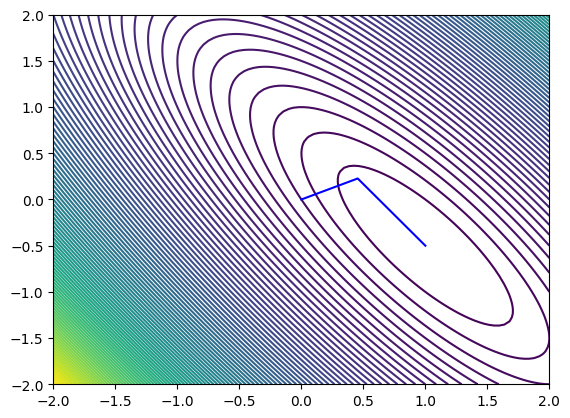

[ 1.  -0.5] True


In [8]:
def cg(self,afX,iMaxiter,fEps):
    bSuccess = False
    #Create a list to plot
    lX=[]
    lY=[]
    lX.append(afX[0])
    lY.append(afX[1])
    afR=self.afb-np.dot(self.aafA,afX)
    afD=np.copy(afR)
    #Iterate over estimates of x
    for ii in range(0,iMaxiter):  
        afR = self.afb-np.dot(self.aafA,afX)
        fTemp = np.dot(afR,afR)
        fRes = sqrt(fTemp)
        print("Iteration: ",ii,"Error: ",fRes,"Position: ",afX,"Direction: ",afD)
        if(fRes < fEps):
            bSuccess = True
            break

        #Compute alfa
        fAlpha=fTemp/np.dot(afR,np.dot(self.aafA,afD))
        #update solution
        afX = afX+fAlpha*afD

        #Find search direction:

        #update r
        afR=afR-fAlpha*np.dot(self.aafA,afD)
        #compute beta
        fBeta=np.dot(afR,afR)/fTemp
        afD=afR+fBeta*afD
        lX.append(afX[0])
        lY.append(afX[1])
    self.plotPath(lX,lY,'b')
    return [afX,bSuccess]

#Adding conjugate gradient method to class
CCG.cg=cg

afX,bSuccess = tQuadraticForm.cg(afX0,iMaxiter,fEps)

print(afX,bSuccess)



#### Convergence

We observe that the above code converge within $n$ iterations. It can be shown that the conjugate gradient method converge after $n$ iterations. Mathematically, it should then converge to the exact solution. However, due to machine precision, we will end up with a small error also after $n$ iterations.

[Previous note](gradientDescent.ipynb) -- [Next note](ludecomposition.ipynb)

## References

[1] Hestenes, Magnus R., and Eduard Stiefel. "Methods of conjugate gradients for solving." Journal of research of the National Bureau of Standards 49.6 (1952): 409.